In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanicdataset-traincsv/train.csv


In [14]:
## Importing Lib 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [4]:
titanic=pd.read_csv('../input/titanicdataset-traincsv/train.csv')

In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA steps ###

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
## check datatypes 
## check null values 

In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic[titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


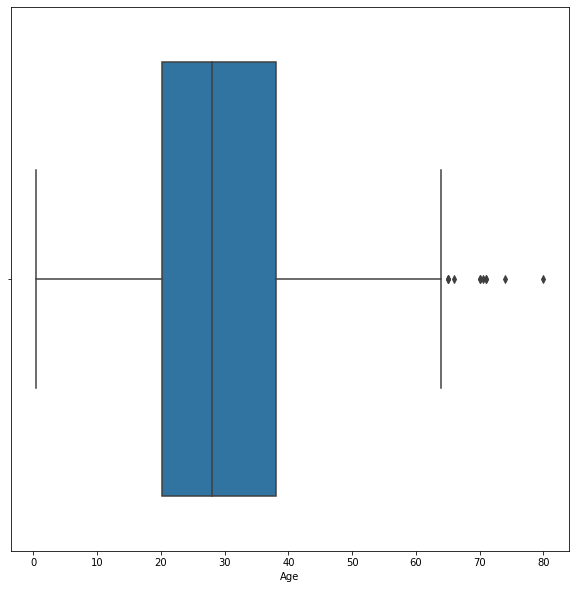

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(titanic.Age)

plt.show()

In [24]:
titanic=titanic.drop(labels='Cabin',axis=1)

In [26]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [32]:
titanic.Age=titanic.Age.fillna(value=titanic.Age.mean())

In [33]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [34]:
titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [35]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
titanic.Embarked=titanic.Embarked.fillna(value='S')

In [37]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Data is clean and ready to be use ----

#######EDA Analysis 

Help on PairGrid in module seaborn.axisgrid object:

class PairGrid(Grid)
 |  PairGrid(data, *, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, corner=False, diag_sharey=True, height=2.5, aspect=1, layout_pad=0.5, despine=True, dropna=False, size=None)
 |  
 |  Subplot grid for plotting pairwise relationships in a dataset.
 |  
 |  This object maps each variable in a dataset onto a column and row in a
 |  grid of multiple axes. Different axes-level plotting functions can be
 |  used to draw bivariate plots in the upper and lower triangles, and the
 |  the marginal distribution of each variable can be shown on the diagonal.
 |  
 |  Several different common plots can be generated in a single line using
 |  :func:`pairplot`. Use :class:`PairGrid` when you need more flexibility.
 |  
 |  See the :ref:`tutorial <grid_tutorial>` for more information.
 |  
 |  Method resolution order:
 |      PairGrid
 |      Grid
 |      _BaseGrid
 |      builtins.

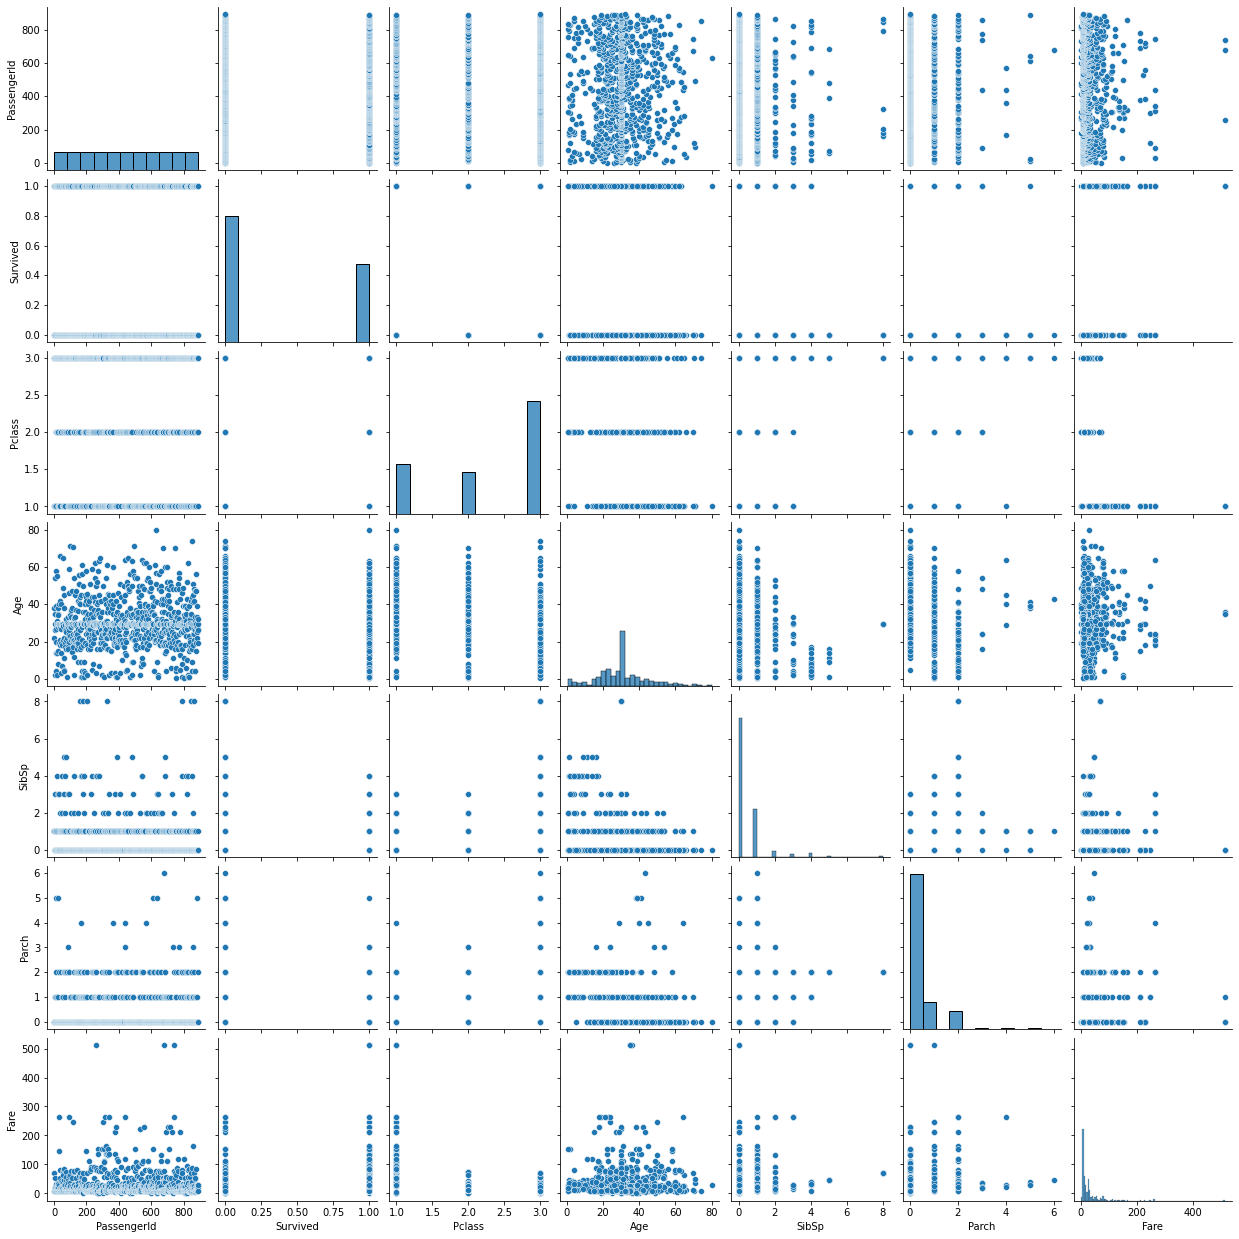

In [40]:
help(sns.pairplot(data=titanic))

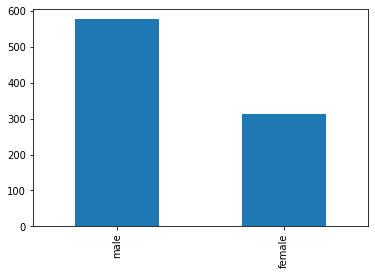

In [48]:
titanic.Sex.value_counts().plot.bar()
plt.show()

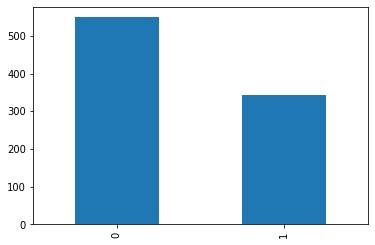

In [50]:
titanic.Survived.value_counts().plot.bar()
plt.show()

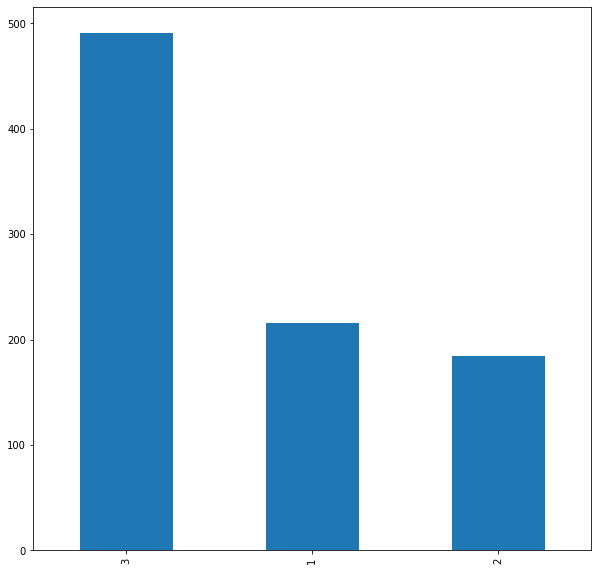

In [52]:
plt.figure(figsize=(10,10))
titanic.Pclass.value_counts().plot.bar()
plt.show()

In [55]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<Figure size 3600x3600 with 0 Axes>

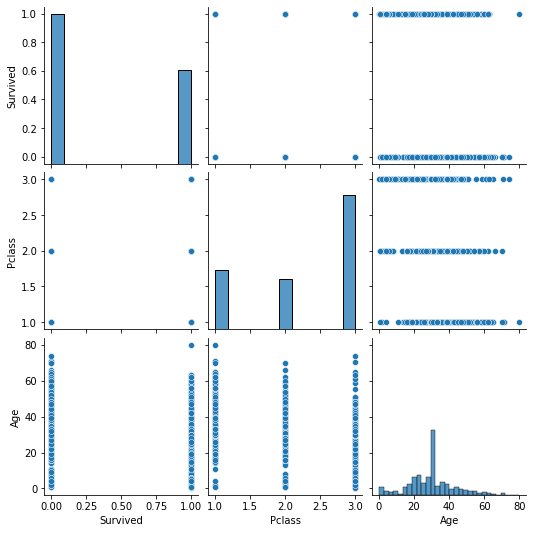

In [63]:
plt.figure(figsize=(50,50))
sns.pairplot(titanic[['Survived','Pclass','Age']])

plt.show()

In [69]:
titanic['AgeGroup']=titanic.Age.apply(lambda x:'Child' if x<12 else 'Adult')

In [72]:
titanic.AgeGroup.value_counts()

Adult    823
Child     68
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

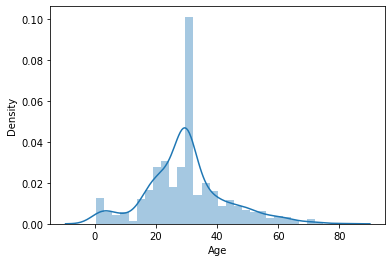

In [74]:
sns.distplot(titanic.Age)

### bivariate analysis

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

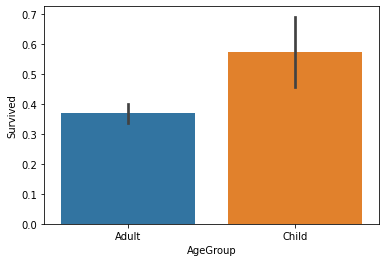

In [82]:
sns.barplot(x='AgeGroup',y='Survived',data=titanic)

In [83]:
### child survived more

In [92]:
titanic[(titanic.AgeGroup=='Child') & (titanic.Survived==1)].shape

(39, 12)

In [93]:
39/68

0.5735294117647058

### 57 % child saved compared to adults

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

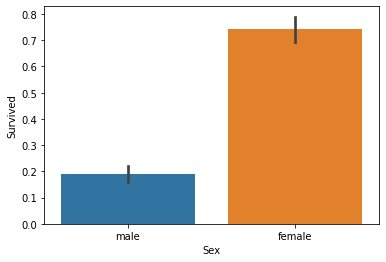

In [94]:
sns.barplot(x='Sex',y='Survived',data=titanic)

### Female survived More compare to Male

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

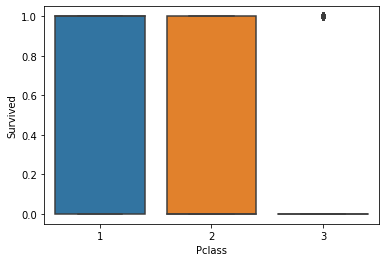

In [102]:
sns.boxplot(x='Pclass',y='Survived',data=titanic)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

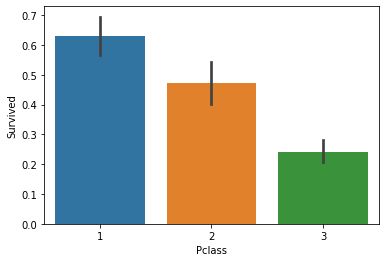

In [103]:
sns.barplot(x='Pclass',y='Survived',data=titanic)

### Class 3 passenger survived less

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

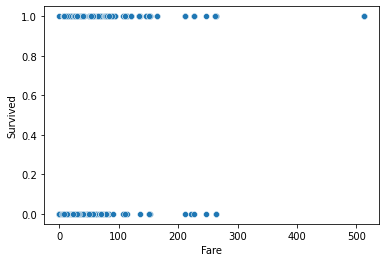

In [104]:
sns.scatterplot(x='Fare',y='Survived',data=titanic)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

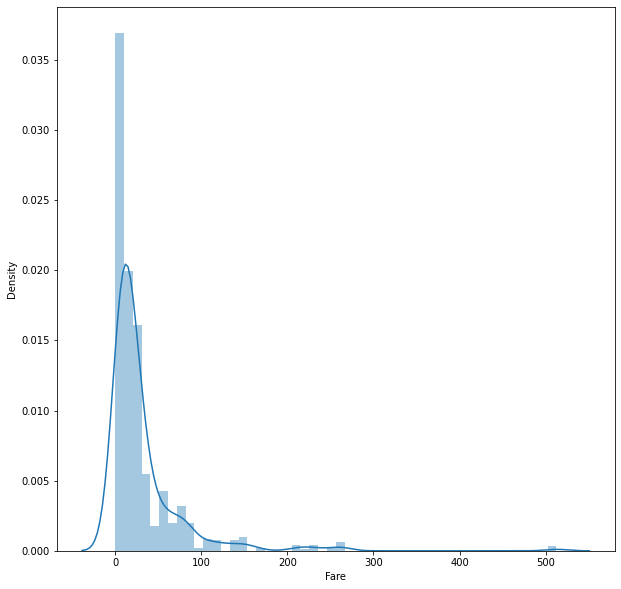

In [108]:
plt.figure(figsize=(10,10))
sns.distplot(titanic.Fare)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

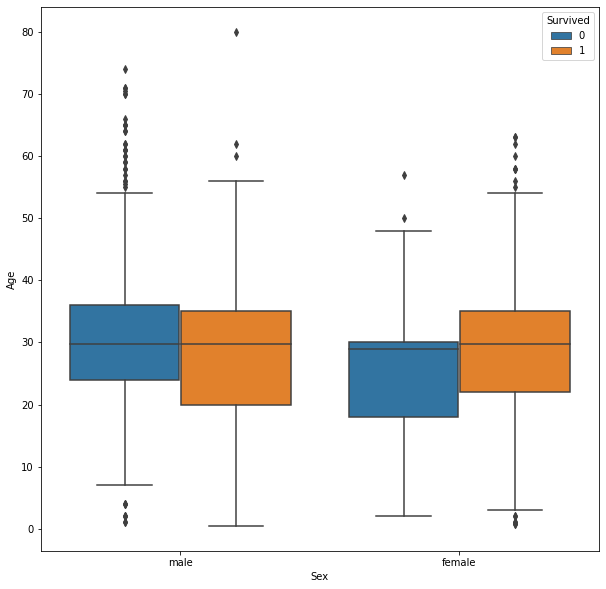

In [114]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Sex',y='Age',hue='Survived',data=titanic)

### Male --> 22 to 38 --> survived 
### Female --> 28 to 38 --> survived

## dispersion is more in Male compare to female 

In [115]:
## EDA done 

# Model Building

In [116]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


In [120]:
titanic.Sex=titanic.Sex.map({'male':1,'female':0})

In [122]:
titanic.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [123]:
titanic.Embarked=titanic.Embarked.map({'S':0,'C':1,'Q':2})

In [124]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,Adult


In [133]:
X_train=titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y_train=titanic['Survived']

In [134]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


In [135]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.2)

In [136]:
print(X_train.shape)

(891, 7)


In [137]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [143]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix

In [144]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [145]:
y_pred=LR.predict(x_test)

In [146]:
confusion_matrix(y_pred,y_test)

array([[93, 22],
       [11, 53]])

In [149]:
from sklearn.metrics import classification_report as cr

print(cr(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       115
           1       0.71      0.83      0.76        64

    accuracy                           0.82       179
   macro avg       0.80      0.82      0.81       179
weighted avg       0.83      0.82      0.82       179

